In [ ]:
import pandas as pd 
import numpy as np 
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

sns.set()
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/customer_segmentation_df.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,135.82,8b8028d453a01986b48c4271cc341475,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,128.04,3edcab192482e9871c17b34cf98c3996,ribeirao das neves,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,279.30,958ac7760e5484df1496ba5833ab6117,gaspar,SC,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,279.30,958ac7760e5484df1496ba5833ab6117,gaspar,SC,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


In [ ]:

df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_category_name_english'],
      dtype='object')

In [ ]:
print("The number of rows and columns: ", df.shape)

The number of rows and columns:  (13801, 26)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   order_purchase_timestamp       13801 non-null  object 
 4   order_approved_at              13801 non-null  object 
 5   order_delivered_carrier_date   13801 non-null  object 
 6   order_delivered_customer_date  13801 non-null  object 
 7   order_estimated_delivery_date  13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_id             13801 non-null  object 
 12  customer_city                  13801 non-null 

In [ ]:
#Get the basic statistics of numerical data
df.describe()

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


In [ ]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
numerical_features.columns

Index(['payment_installments', 'payment_value', 'order_item_id', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght'],
      dtype='object')

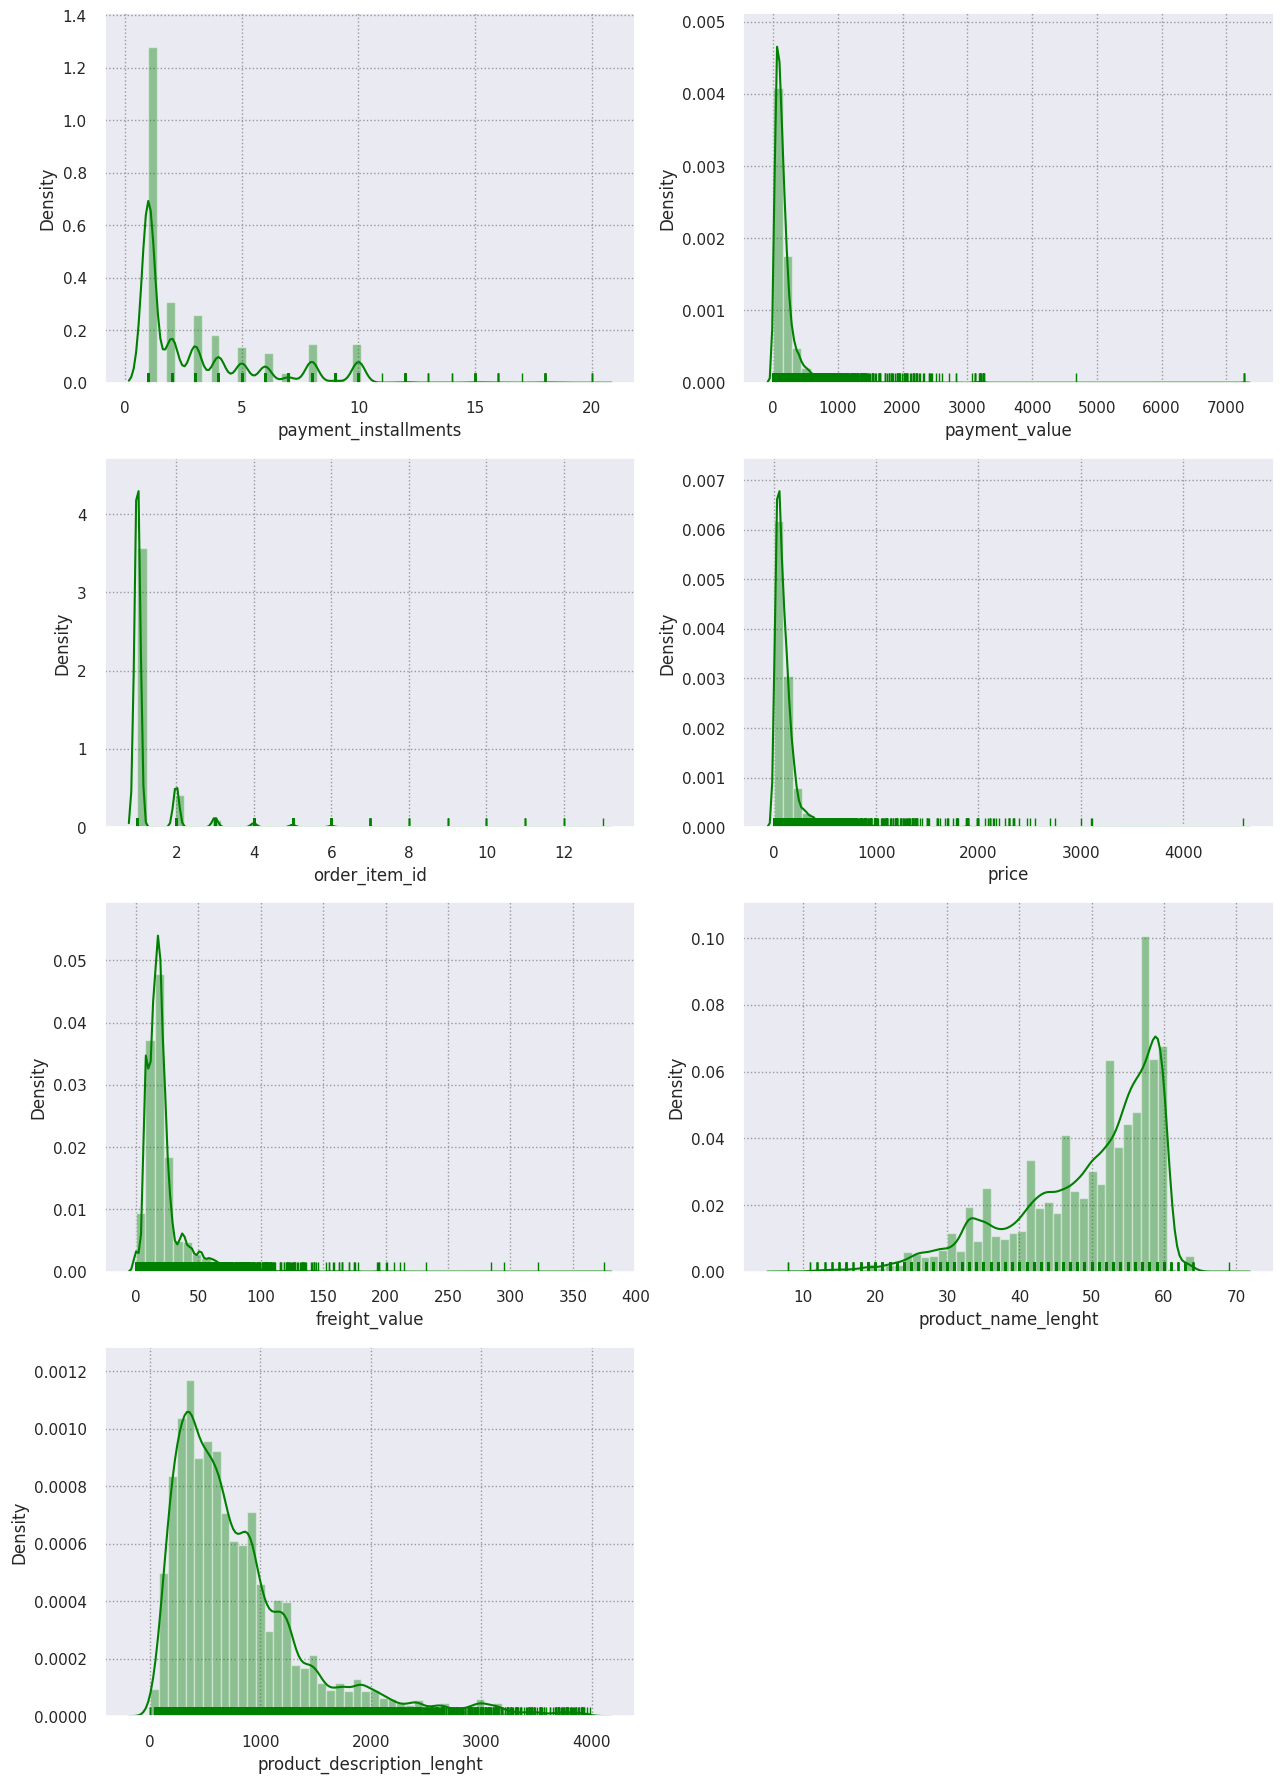

In [ ]:
#Check the distribution of data
fig = plt.figure(figsize=(13,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(4,2, i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna() , rug = True, hist = True,
                label = 'UW', kde_kws = {'bw':0.1}, color = 'green')
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

`Let's try answer for the following question: Looking the price do you think the dataset is balanced?`

_By looking the statistical measures for **price** column, we noticed that **mean** and **median** values are different, it typically indicates that the distribution of the data is not symmetrical or is skewed. And it's was proven by distribution plot, the price data has **positive skew** (right skew) because it has more extreme values, the mean is larger than the median._

_Also another numerical data (payment_value, product_description_length, product_name_length, freight_value) has skewness and outliers_, which suggests that the distribution of these variables is not balanced as well. We can confirm this by looking at the distribution plots for each of these variables.

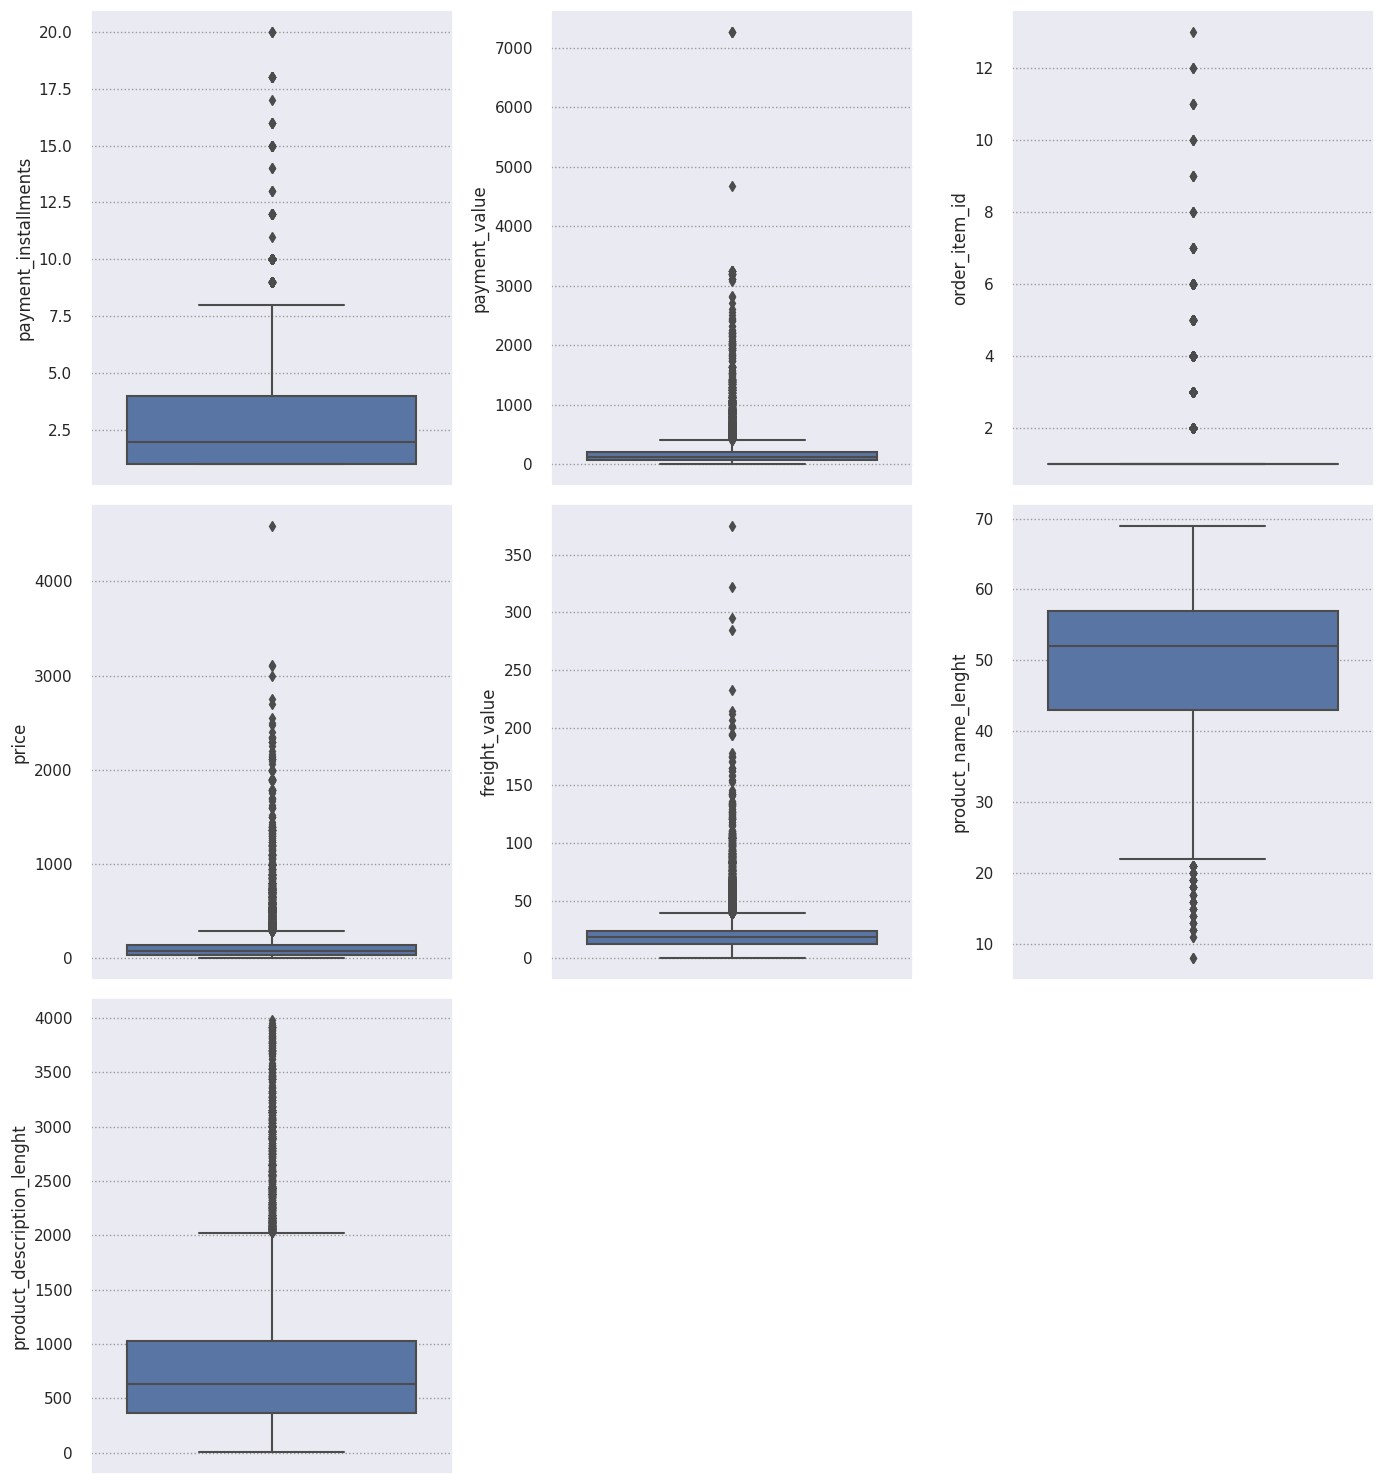

In [ ]:
#Univarite analysis and looking for outliers on the data
fig = plt.figure(figsize = (14, 15))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(3,3, i+1)
    sns.boxplot(y = numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

_By looking the above boxplots we can conclude the numerical data columns has data points that significantly deviate from the rest of the data in a dataset. In some cases outliers are significantly higher and in another cases they are lower the the median of dataset_

In [ ]:
#Let's define categorial values
cat_cols = ['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name']
cat_cols

['customer_city',
 'customer_state',
 'seller_city',
 'seller_state',
 'product_category_name']

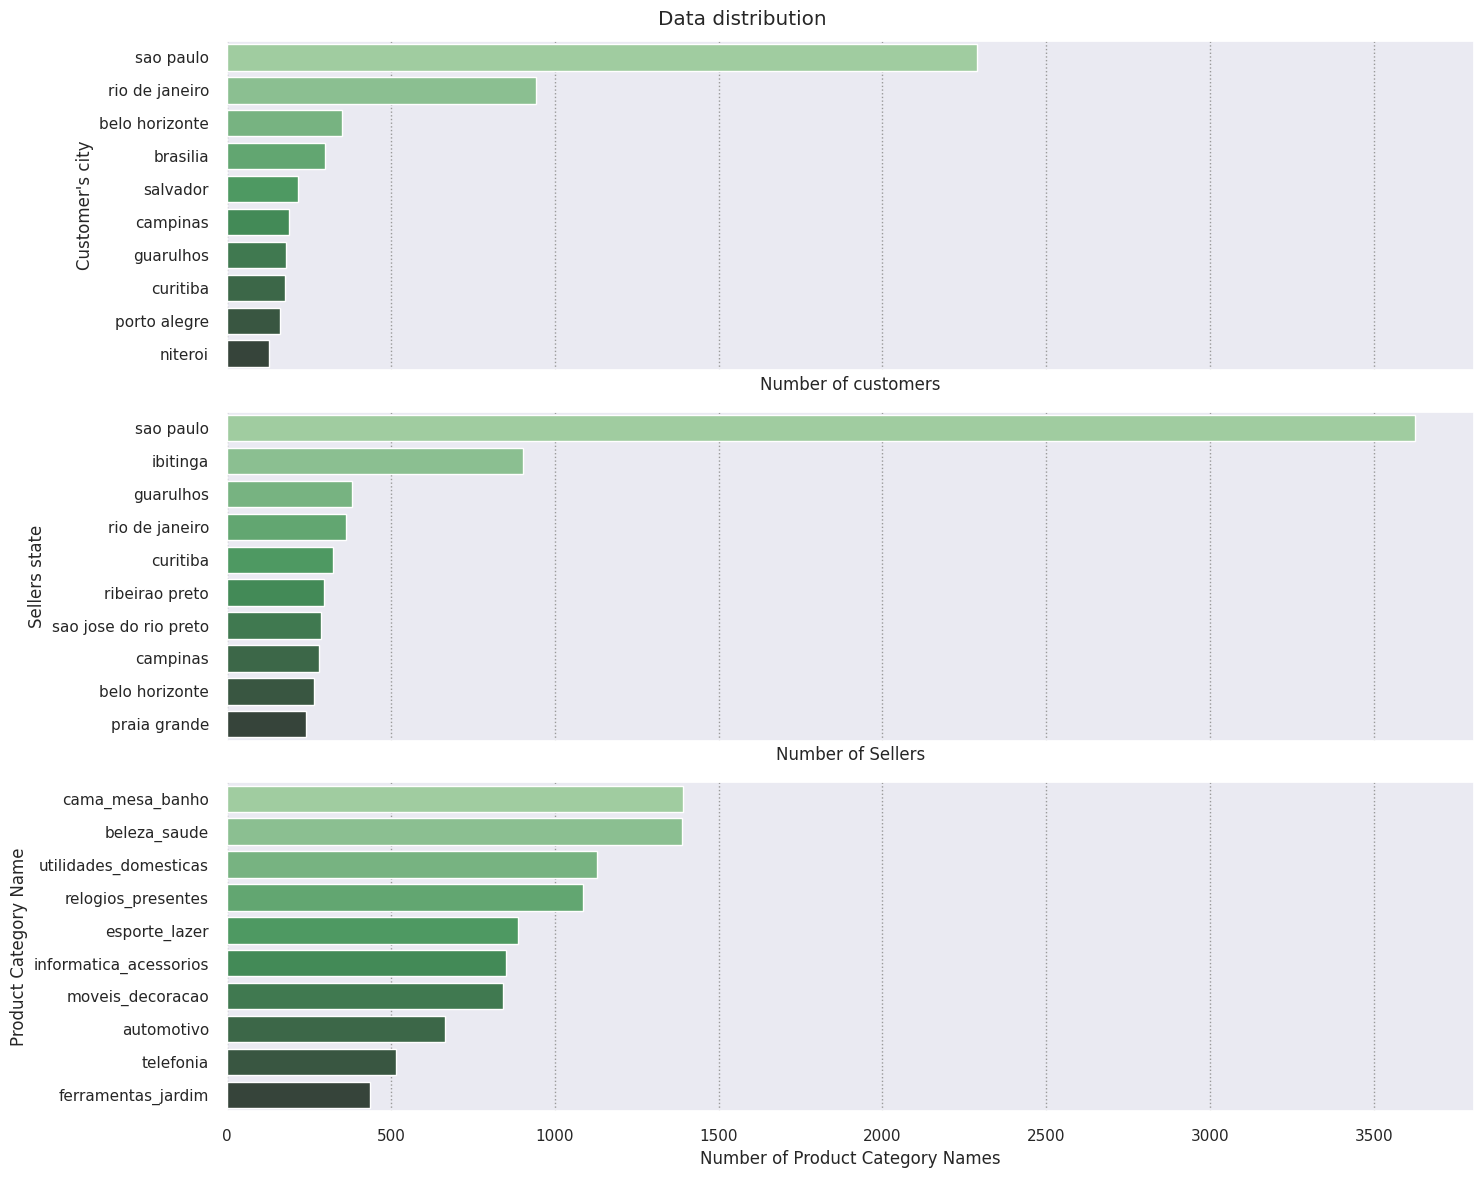

In [ ]:
figure, ax = plt.subplots(3, 1, sharex = True, figsize = (15, 12))

figure.suptitle('Data distribution')

sns.countplot(y = 'customer_city', data = df, palette="Greens_d", 
            order = df.customer_city.value_counts().iloc[:10].index, ax = ax[0])
ax[0].set_xlabel("Number of customers", fontsize= 12)
ax[0].set_ylabel("Customer's city", fontsize= 12) 

sns.countplot(y = 'seller_city', data = df, palette="Greens_d", 
            order = df.seller_city.value_counts().iloc[:10].index, ax = ax[1])
ax[1].set_xlabel("Number of Sellers", fontsize= 12)
ax[1].set_ylabel("Sellers state", fontsize= 12) 

sns.countplot(y = 'product_category_name', data = df, palette="Greens_d", 
            order = df.product_category_name.value_counts().iloc[:10].index, ax = ax[2])
ax[2].set_xlabel("Number of Product Category Names", fontsize= 12)
ax[2].set_ylabel("Product Category Name", fontsize= 12) 

plt.tight_layout()
plt.show()

In [ ]:
#Percentage ratio for Sao Pao
print('The Sao Paulo Seller city percentage: {} %'.format(round((df.seller_city.value_counts()[0] * 100) / df.count()[0])))
print('The Sao Paulo Customer percentage: {} %'.format(round((df.customer_city.value_counts()[0] * 100) / df.count()[0])))

The Sao Paulo Seller city percentage: 26 %
The Sao Paulo Customer percentage: 17 %


Looking the customer_city distribution do you think the dataset is balanced? 

_As you can see the most customers and sellers are located in Sao Paulo. The Sao Paulo and Ibitinga Sellers covered about 40% of all sellers in the country._ Based on the countplot visualization of customer_city, it appears that the dataset is not balanced. The majority of customers are concentrated in a few cities, such as São Paulo, Rio de Janeiro, Belo Horizonte, and Brasília, with very few customers in other cities. This suggests that the dataset may not be representative of the entire country and may be biased towards certain regions. 

<Axes: title={'center': 'High Correlation'}>

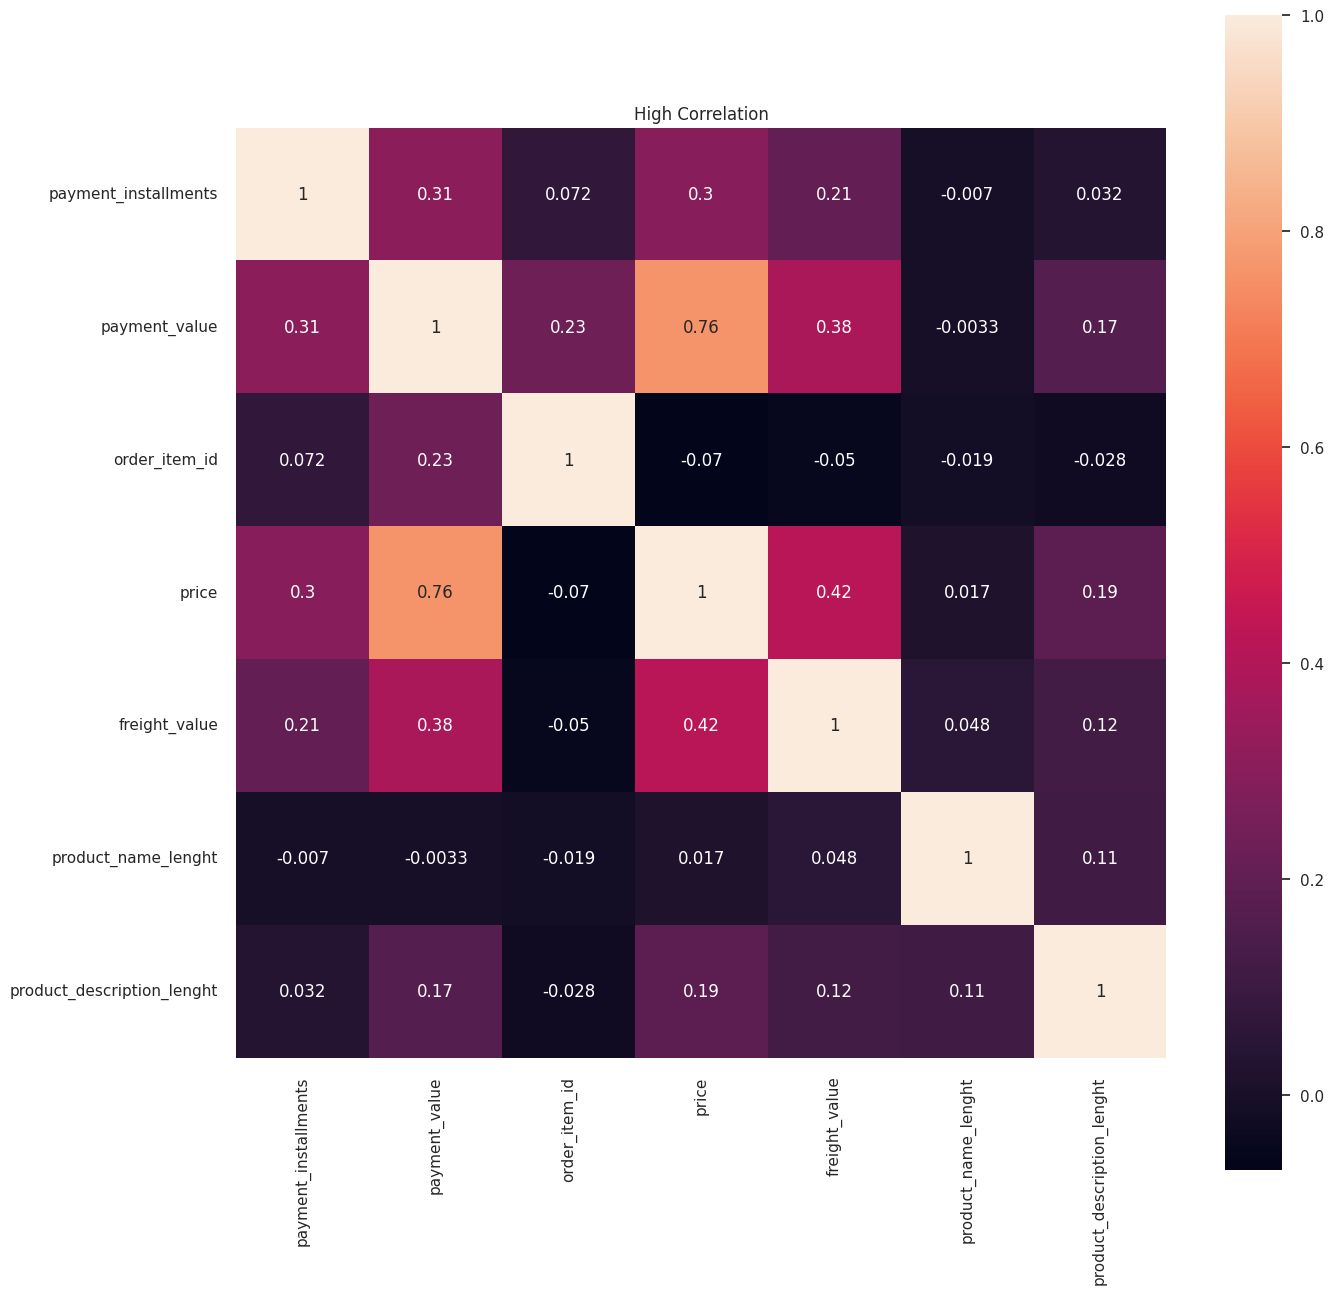

In [ ]:
num_corelations = df.select_dtypes(exclude = 'object').corr()
plt.figure(figsize = (15,15))
plt.title('High Correlation')
sns.heatmap(num_corelations, annot = True, square = True)

_We build a **correlation matrix** to display the correlation coefficients between multiple variables in a data set. Here the diagonal elements are always equal to 1 since they represent the correlation of a variable with itself, and the off-diagonal elements represent the pairwise correlations between different variables. In table above we can see the positive and negative correlations between variables. Let's look closer to positive correlated variables with regression plot. Here we can mention that thier is no any highly correlated variables._

_They are:_ 
            **price and payment_value**; **price and freight_value**; **payment_value and freight_value**. 
            
_Logically this values will be corralated with each other because all of them shows the price or value of item_

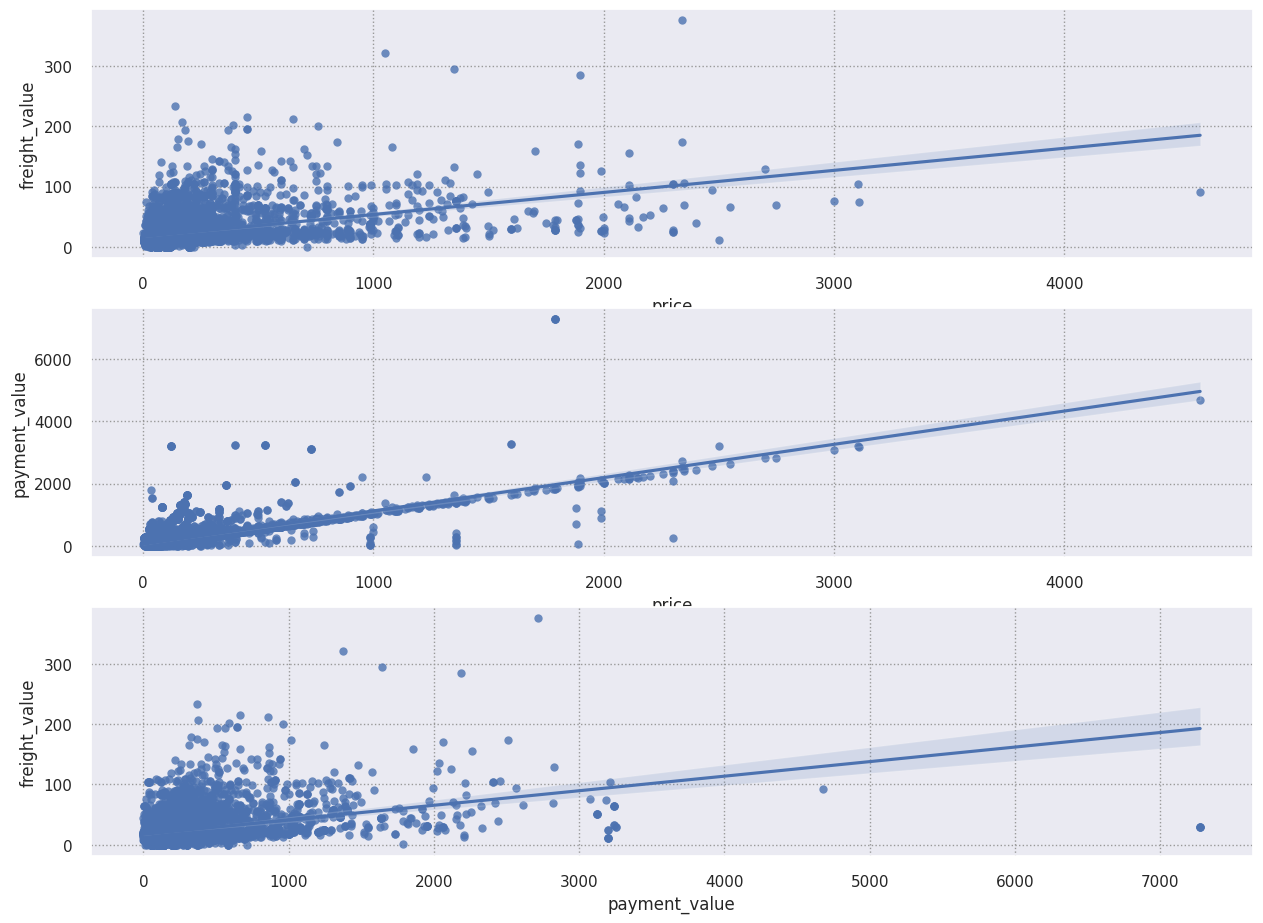

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)

figure.set_size_inches(15, 11)

_ = sns.regplot(data = df, x = df['price'] , y = df['freight_value'], ax = ax1)
_ = sns.regplot(data = df, x = df['price'] , y = df['payment_value'], ax = ax2)
_ = sns.regplot(data = df, x = df['payment_value'] ,y =  df['freight_value'], ax = ax3)

The first subplot shows the relationship between the **price** 
 and **freight_value** columns, the second subplot shows the relationship between the **price** and **payment_value** columns, and the third subplot shows the relationship between the  **payment_value** and **freight_value** columns.
These scatter plots allow us to visually assess the strength and direction of the relationship between the variables, while the regression lines help us to understand the linear relationship between them.

In [ ]:
# The following code shows that, the data has duplicated rows, let's delete duplicated rows
print("Initial shape: ", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates: ", df.shape)

Initial shape:  (13801, 26)
After removing duplicates:  (13718, 26)


### RFM 

To perform **RFM analysis** we need a few detials of each customer:

1. Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?
2. Frequency (F) as the total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.
3. Monetary (M) as total money spent: How many $ has this customer spent? Simply total up the money from all transactions to get the M value.
 
Also we need to extract the necessary details for each customer, including recency (R), frequency (F), and monetary value (M). Based on the provided dataset, we will require the following columns:

*Customer unique ID:* To identify each unique customer.
*Order ID:* To determine the number of transactions made by each customer.
*Order date:* To calculate the recency value by subtracting the most recent purchase date from the current date.
*Payment value:* To calculate the monetary value by summing up the money spent by each customer.

In [ ]:
# To correct calculation the RFM score, let's take only the approved order status
df = df[df['order_status'] != 'canceled']
df.order_status.value_counts()

delivered     13414
shipped         153
invoiced         54
processing       11
Name: order_status, dtype: int64

This code filters the dataframe to only include rows where the order_status is not equal to "canceled". This is done to exclude canceled orders from the RFM analysis, as they may not be representative of the customer's actual behavior. The last line of code checks the count of unique order_status values to ensure that only approved orders remain in the dataset.

In [ ]:
# Prepare data to calculate RFM score
rfm_df = df.groupby(['order_id', 'customer_unique_id', 'order_approved_at', 'order_item_id']).agg({'price' : 'max', 'freight_value' : 'max'})
rfm_df = rfm_df.reset_index()
rfm_df['total_value'] = rfm_df['price'] + rfm_df['freight_value']
rfm_df = rfm_df.groupby(['order_id', 'customer_unique_id', 'order_approved_at']).agg({'total_value' : 'sum'})
rfm_df = rfm_df.reset_index()
rfm_df.head()

,order_id,customer_unique_id,order_approved_at,total_value
0,0006ec9db01a64e59a68b2c340bf65a7,7ed0ea20347f67fe61d1c99fdf8556ae,2018-07-24 17:24:20,97.32
1,000aed2e25dbad2f9ddb70584c5a2ded,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:57:03,152.77
2,00130c0eee84a3d909e75bc08c5c3ca1,b5910f24d2483d697b37e3857b621061,2018-06-12 05:16:24,35.84
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,43860f86362fea12550bfa19ef73015f,2018-05-19 10:59:50,51.10
4,002175704e8b209f61b9ad5cfd92b60e,e7d41c19da317af0612170197303d5a9,2018-04-24 17:24:48,123.11


In this code prepares the data for calculating the RFM score. It first filters out all orders that have been canceled, as these are not considered valid transactions. Then, it groups the remaining data by order_id, customer_unique_id, order_approved_at, and order_item_id, and calculates the maximum price and freight_value for each group. It then creates a new column called 'total_value', which is the sum of the price and freight_value columns. Finally, it groups the data by order_id, customer_unique_id, and order_approved_at, and calculates the sum of the total_value column for each group. The resulting dataframe contains the necessary information to calculate the RFM score for each customer.

In [ ]:
#Let's take the last order date 
print("The last order date is: ", rfm_df.order_approved_at.max())
print("So, we used this dataset as NOW date to calculate recency")

# In order to calculate time span, also we want to see the first order date
print("The first order date is: ", rfm_df.order_approved_at.min())


The last order date is:  2018-08-29 15:05:22
So, we used this dataset as NOW date to calculate recency
The first order date is:  2017-05-06 02:15:56


Time span is approximately 1 year and 3 months.

In [ ]:
#Count the unique number of order by customers
rfm_df.customer_unique_id.value_counts()

a029899dd8534557a81c369475ff80c8    3
9c08d6f85c7fcec4b08ead25590c0af7    3
64df076fb557552498049bb07ed1cd5f    3
cfa69922f9968e0e6271647abda09b09    3
d4a5e9f19897de65433c9d97bf4b9f8e    3
                                   ..
aea5f1928eb4d8d8b016f6f101566984    1
d340df45a3f9a5f72adc67289c1ca8fe    1
4281cad3192208b2d0100eb08c8f6fce    1
49f8f2dffe67c9b429827fdb48bdffc4    1
adee1f41a8a1659b461473d88cb6975e    1
Name: customer_unique_id, Length: 11186, dtype: int64

In [ ]:
# Let's convert date to convenient format for us
rfm_df['order_approved_at_date'] = pd.to_datetime(rfm_df.order_approved_at).dt.strftime('%Y-%m-%d')
rfm_df['order_approved_at_date'] = pd.to_datetime(rfm_df['order_approved_at_date'])
rfm_df.head()

,order_id,customer_unique_id,order_approved_at,total_value,order_approved_at_date
0,0006ec9db01a64e59a68b2c340bf65a7,7ed0ea20347f67fe61d1c99fdf8556ae,2018-07-24 17:24:20,97.32,2018-07-24
1,000aed2e25dbad2f9ddb70584c5a2ded,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:57:03,152.77,2018-05-11
2,00130c0eee84a3d909e75bc08c5c3ca1,b5910f24d2483d697b37e3857b621061,2018-06-12 05:16:24,35.84,2018-06-12
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,43860f86362fea12550bfa19ef73015f,2018-05-19 10:59:50,51.10,2018-05-19
4,002175704e8b209f61b9ad5cfd92b60e,e7d41c19da317af0612170197303d5a9,2018-04-24 17:24:48,123.11,2018-04-24


In [ ]:
rfm_df.order_approved_at_date.max()

Timestamp('2018-08-29 00:00:00')

In [ ]:
# We take as today's date as maximum date from our dataset
NOW = dt.datetime(2018, 8, 29)
NOW

datetime.datetime(2018, 8, 29, 0, 0)

the date August 29th, 2018, which we will use as the reference date for calculating recency.


In [ ]:
#calculate RFM table
rfm_table = rfm_df.groupby('customer_unique_id').agg({'order_approved_at_date' : lambda x: (NOW - x.max()).days,
                                                     'order_id': lambda x: len(x.unique()),
                                                    'total_value' : lambda x: x.sum()})

In [ ]:
# Renaming columns
rfm_table.rename(columns = {'order_approved_at_date' : 'recency',
                           'order_id' : 'frequency',
                           'total_value' : 'monetary_value'}, inplace=True)

## **Number of customers by number of orders**
The fact that the minimum number of orders was equal to 1 and the maximum number was equal to 3 caused us to do a more detailed investigation on their transactions and frequency. As you can see in the diagram, most of the customers registered only one order in the desired time period. Probably, we do not have loyal followers in this dataset, but we should identify the segment that has the potential to become loyal.

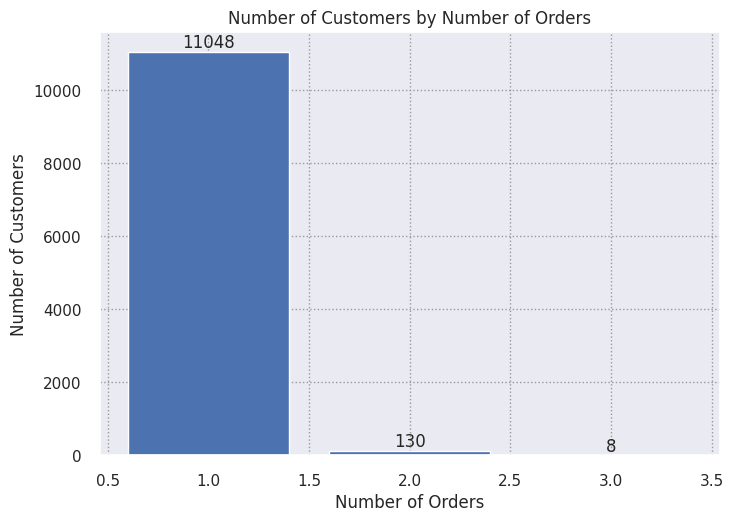

In [ ]:

# Count the unique number of orders by customers
order_counts = rfm_df['customer_unique_id'].value_counts()

# Count the frequency of each order count
order_counts_counts = order_counts.value_counts().sort_index()


plt.bar(order_counts_counts.index, order_counts_counts.values)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Number of Orders')


for i, count in enumerate(order_counts_counts.values):
    plt.text(order_counts_counts.index[i], count, str(count), ha='center', va='bottom')


plt.show()


In [ ]:
rfm_table.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75
00172711b30d52eea8b313a7f2cced02,32,1,122.07
001928b561575b2821c92254a2327d06,5,1,164.81
0019e8c501c85848ac0966d45226fa1d,120,1,197.27


### Appraoch - 1 

_For this approach we used Quantiles method to divide calcluated RFM score to equal segments. It's functionality based on statistical method used to divide a dataset into segments or groups based on the distribution of a particular variable. Quantiles are values that divide a dataset into equal intervals or segments based on their rank or position within the dataset._ Also Approach 1 is a common method for RFM analysis and involves dividing customers into segments based on quantiles of their R, F, and M scores.

For example, we  used the following quantiles:

R Score: 4 quantiles, with a lower recency score indicating a more recent purchase
F Score: 4 quantiles, with a higher frequency score indicating more purchases
M Score: 4 quantiles, with a higher monetary score indicating higher spending
We can then assign a score between 1 and 4 to each of the R, F, and M scores, where 1 indicates the lowest quartile and 4 indicates the highest quartile. Finally, we can combine the three scores to create an overall RFM score between 111 and 444, where 111 indicates the lowest RFM score and 444 indicates the highest RFM score.

This approach allowed us to segment customers into groups based on their behavior and identify which customers are most valuable to the business. 

In [ ]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,34.0,1.0,66.1500
0.50,72.0,1.0,114.6900
0.75,110.0,1.0,191.2575


In [ ]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----

RFM_Segment = rfm_table.copy()

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))    
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [ ]:
RFM_Segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,1,3,113
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75,4,1,1,411
00172711b30d52eea8b313a7f2cced02,32,1,122.07,4,1,3,413
001928b561575b2821c92254a2327d06,5,1,164.81,4,1,3,413
0019e8c501c85848ac0966d45226fa1d,120,1,197.27,1,1,4,114


_The resulting RFM class will be a combination of the R, F, and M quartiles, which will range from 111 to 444. So, Customers grouped into segments based on their combined **RFM scores**, which can help identify different customer segments. After all calculation we can make some assumption about our customers based on their distinct characteristics, behaviors, and needs._

In [ ]:
RFM_Segment['RFMClass'] = RFM_Segment['RFMClass'].astype('int')
RFM_Segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,1,3,113
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75,4,1,1,411
00172711b30d52eea8b313a7f2cced02,32,1,122.07,4,1,3,413
001928b561575b2821c92254a2327d06,5,1,164.81,4,1,3,413
0019e8c501c85848ac0966d45226fa1d,120,1,197.27,1,1,4,114


For example, an RFM score of 413 means a customer has a recency score of 4, a frequency score of 1, and a monetary score of 3.

In [ ]:
#Let's find our best customer. Who are our best customers?

RFM_Segment[RFM_Segment['RFMClass'] == 444].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
839a04051a2c347397fd425d01fc3eb2,20,2,945.95,4,4,4,444
b2e9a05d23ea17713b5d7799f2004f8e,29,3,782.64,4,4,4,444
240f980f7c03e873c538e86792646919,22,2,553.80,4,4,4,444
27eecff5a6338f7c36c78ad05eacc575,13,2,547.74,4,4,4,444
0e4d012fac3d20c033e0284fb6d2ea6a,8,2,532.48,4,4,4,444



From the RFM analysis, the customers with the RFM score of 444 are the best customers, which means they have made recent purchases, are frequent buyers, and have spent the most amount of money.

In [ ]:
# Customers who are prone to churn 

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,1,3,113
0019e8c501c85848ac0966d45226fa1d,120,1,197.27,1,1,4,114
0034c76b7e6a17d738375b99afc2f01e,114,1,44.23,1,1,1,111
0035029989e6fc5cf030918a5f9f2037,109,1,546.12,2,1,4,214
004b45ec5c64187465168251cd1c9c2f,92,1,49.85,2,1,1,211


These are the customers who are prone to churn as they haven't made a purchase in a long time and are in the lower quartile of recency scores.

In [ ]:
#Let's find the lost customers by RFM segment

RFM_Segment[RFM_Segment['RFMClass'] == 111].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
705a9cfeebdbeb15d9464592d9e97fec,114,1,66.06,1,1,1,111
704797965ae2be5d589d40c610a5d6b6,132,1,66.06,1,1,1,111
375f43dbfdd8411099e469df43b49b81,120,1,66.01,1,1,1,111
4ab8a5648f2476603ab06f5b42f457de,116,1,65.83,1,1,1,111
578a719055f199cc37fc781c943a51dd,123,1,65.79,1,1,1,111


From the RFM analysis, we can see that customers who are in the RFMClass of 111 are the lost customers. These customers have low recency, frequency, and monetary value scores, indicating that they have not made any purchases in a long time, and their purchases were low in value.

In [ ]:
# Find the loyal customers, with high frequency

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0341bbd5c969923a0f801b9e2d10a7b8,91,2,1999.68,2,4,4,244
fc24db02becd484accefaa5af59c18b1,64,2,1588.95,3,4,4,344
fe81bb32c243a86b2f86fbf053fe6140,69,2,1384.32,3,4,4,344
a56df37f1251ec47d5ad53dab3043f38,70,2,1321.63,3,4,4,344
e271fa40aa8fea4e0f304b3768b65d6a,111,2,1225.08,1,4,4,144


Here are the top 5 customers who are loyal and have high frequency:

### Approach - 2

_K-means algorithm can be used in conjunction with RFM (Recency, Frequency, Monetary) segmentation to further analyze and group customers based on their RFM scores._

_Using K-means algorithm with RFM segmentation can provide valuable insights into customer behavior and preferences, helping businesses better understand and target their customer segments for more effective marketing strategies and improved customer relationships._
K-means algorithm can be used to further analyze and group customers based on their RFM scores. K-means clustering is an unsupervised learning algorithm that groups data points into clusters based on their similarity. In the context of RFM segmentation, K-means clustering can be used to group customers into distinct clusters based on their RFM scores.

In [ ]:
# Previously our calculated RFM scores for each customer
rfm_table.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75
00172711b30d52eea8b313a7f2cced02,32,1,122.07
001928b561575b2821c92254a2327d06,5,1,164.81
0019e8c501c85848ac0966d45226fa1d,120,1,197.27


We calculated the RFM scores for each customer using their transactional data.

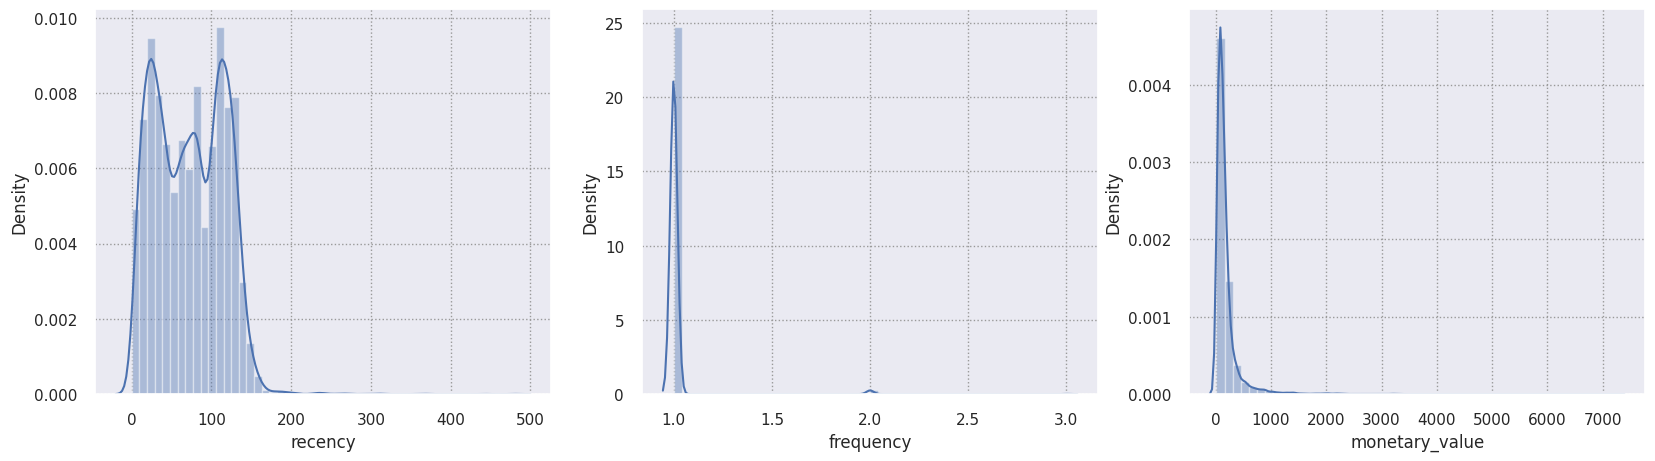

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
for i, features in enumerate(list(rfm_table.columns)):
    sns.distplot(rfm_table[features], ax = axes[i])

We can notice that the column **monetary_value** is skewed strongly to the right, which can be problematic for k-means clustering.  Therefore, we need to transform it so that it has a normal distribution. To do this, we will use the logarithm transformation.

In [ ]:
# To prevent data skewness
rfm_logged_table = rfm_table.copy()

rfm_logged_table['recency'] = rfm_logged_table['recency'].apply(lambda x: np.log(x))
rfm_logged_table['frequency'] = rfm_logged_table['frequency'].apply(lambda x: np.log(x))
rfm_logged_table['monetary_value'] = rfm_logged_table['monetary_value'].apply(lambda x: np.log(x))
rfm_logged_table.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,4.709530,0.0,4.955123
000ec5bff359e1c0ad76a81a45cb598f,2.079442,0.0,3.323236
00172711b30d52eea8b313a7f2cced02,3.465736,0.0,4.804595
001928b561575b2821c92254a2327d06,1.609438,0.0,5.104793
0019e8c501c85848ac0966d45226fa1d,4.787492,0.0,5.284573


Applying a log transformation to the RFM scores can help reduce skewness and make the distribution of the data more normal. This is because the log transformation compresses the range of high values and expands the range of low values, which can help create a more even distribution of the data

In [ ]:
rfm_logged_table = rfm_logged_table.replace([np.inf, -np.inf, -0], 0)

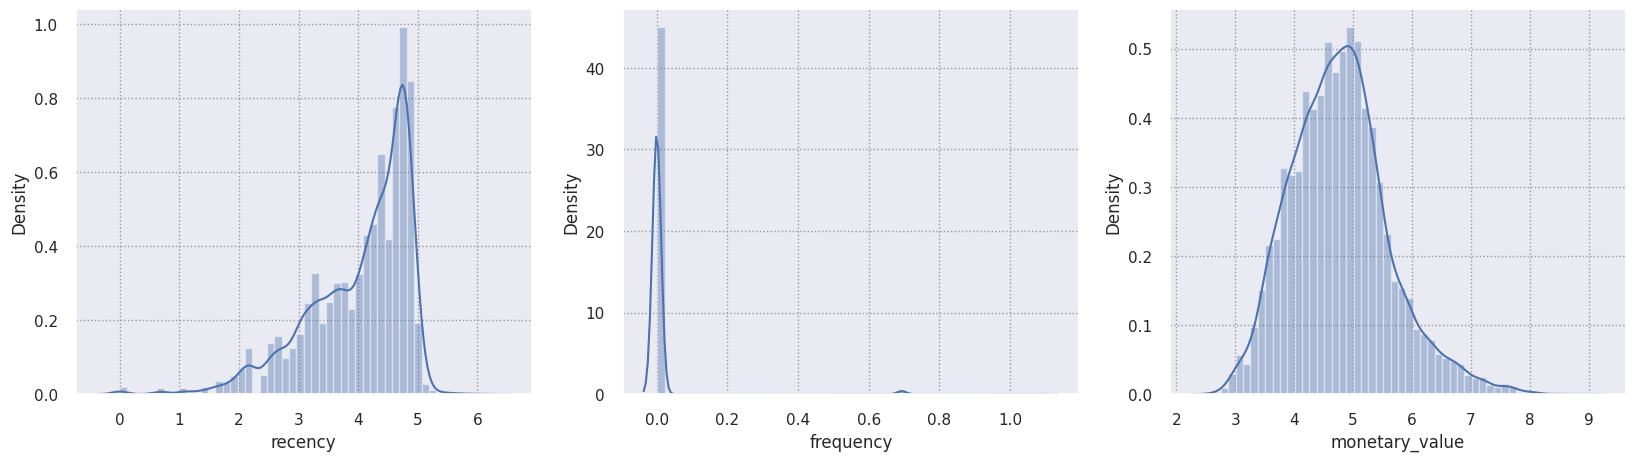

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
for i, features in enumerate(list(rfm_logged_table.columns)):
    sns.distplot(rfm_logged_table[features], ax = axes[i])

_The **frequency** and **monetary_value** columns has similiar distribution with right skewness of data. **Recency** data has bimodal distribution with two distinct modes or peaks in the data. In other words, a bimodal distribution is characterized by having two prominent peaks or modes in the frequency distribution of data values._ 
The distribution of the features now looks much more symmetrical and less skewed after taking the logarithmic transformation. This will help improve the accuracy of clustering using K-means algorithm.

In [ ]:
# Sample descriptive statistics for RFM
rfm_logged_table.describe()

,recency,frequency,monetary_value
count,11186.000000,11186.000000,11186.000000
mean,4.027873,0.008841,4.775093
std,0.839280,0.079808,0.835882
min,0.000000,0.000000,2.631169
25%,3.526361,0.000000,4.191925
50%,4.276666,0.000000,4.742233
75%,4.700480,0.000000,5.253621
max,6.173786,1.098612,8.892183


The output of the above code gives us the descriptive statistics for the RFM scores after performing the log transformation. The count row indicates that there are 4338 customers in our dataset. The mean row shows the mean values for each RFM score, which are now in log scale. The std row shows the standard deviation of each RFM score, which indicates the spread of data points from the mean. The min and max rows show the minimum and maximum values of each RFM score, respectively. The 25%, 50%, and 75% rows represent the first, second (median), and third quartiles of the data distribution for each RFM score.

Before building the **KMeans algorithms**, we saw that data has variation, and KMeans algorithm is a distance based, so adjusting range common range is required to avoid building biased model. It means, we must to pre-process the data by standartizing them._ 

In [ ]:
# Data pre-processing
scaler = MinMaxScaler()

rfm_norm = pd.DataFrame(scaler.fit_transform(rfm_logged_table))
rfm_norm.columns = ['new_recency', 'new_frequency', 'new_monetary_value']
rfm_norm.describe()

,new_recency,new_frequency,new_monetary_value
count,11186.000000,11186.000000,11186.000000
mean,0.652415,0.008048,0.342424
std,0.135943,0.072644,0.133506
min,0.000000,0.000000,0.000000
25%,0.571183,0.000000,0.249282
50%,0.692714,0.000000,0.337176
75%,0.761361,0.000000,0.418854
max,1.000000,1.000000,1.000000



The rfm_norm dataframe contains the normalized values of the RFM features, which have been preprocessed by applying a MinMaxScaler to scale them to a range between 0 and 1. This normalization step is necessary to ensure that all features contribute equally to the K-means clustering algorithm and prevent any one feature from dominating the others. The describe() function provides descriptive statistics for the normalized values, such as mean, standard deviation, and quartiles.

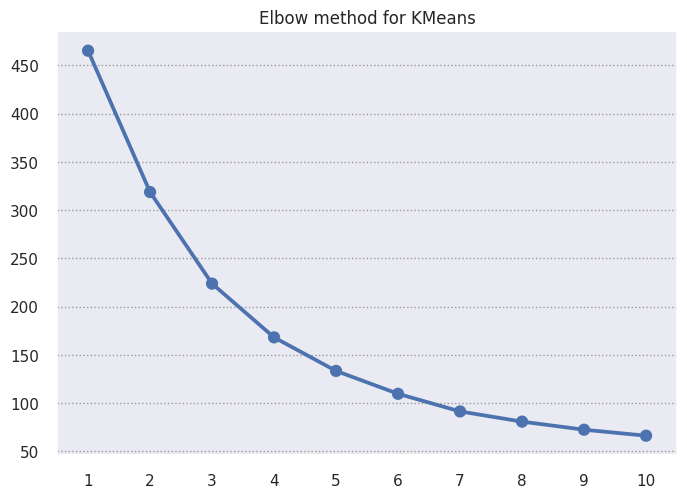

In [ ]:
# Build the model

SSE = []
for k in range (0, 10):
    km = KMeans(n_clusters = k+1, random_state = 42).fit(rfm_norm)
    SSE.append(km.inertia_)
    
plt.title('Elbow method for KMeans')
sns.pointplot(x=list(range(1, 11)), y = SSE)
plt.show()

_Elbow at **k=4** shows the best results. After the point 4 the decrement in inertia is insignificant, it does not worth to further complicate the model_

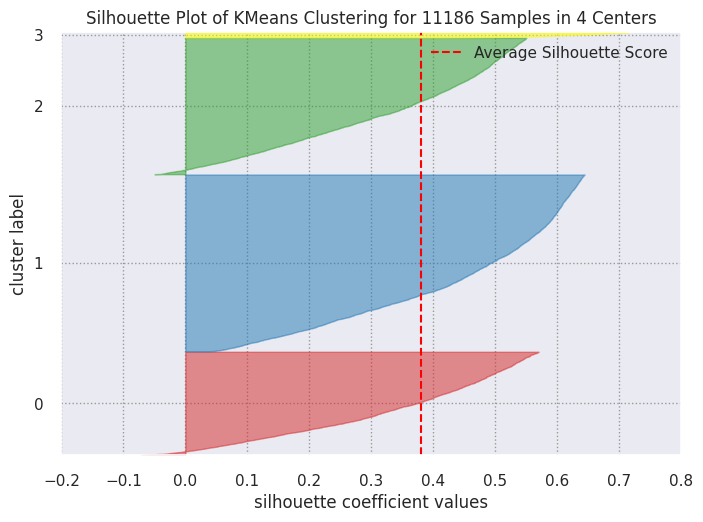

<Figure size 800x550 with 0 Axes>

In [ ]:
# Set up the silhouette visualizer for k = 4 with custom colors
colors = ['tab:red', 'tab:blue', 'tab:green', 'yellow']
visualizer = SilhouetteVisualizer(KMeans(4, random_state=42), colors=colors)

visualizer.fit(rfm_norm)

visualizer.show()    
plt.savefig('/content/drive/MyDrive/Machine_Learning')

In [ ]:
model = KMeans(n_clusters=4, random_state = 42).fit(rfm_norm)
centers = model.cluster_centers_

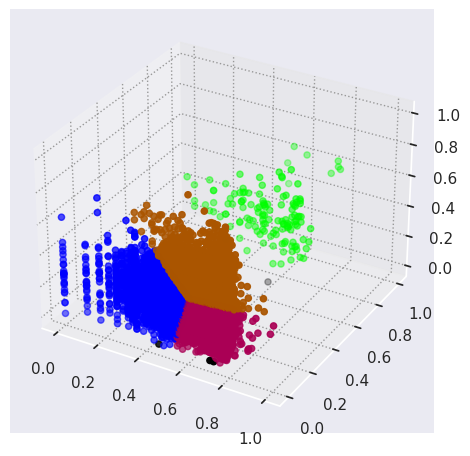

In [ ]:
#This code is creating a 3D scatter plot using Matplotlib library in Python
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_norm['new_recency'], rfm_norm['new_frequency'], rfm_norm['new_monetary_value'], cmap = 'brg',
          c=model.predict(rfm_norm))
ax.scatter(centers[:, 0], centers[:, 1], c='black')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(rfm_norm, x='new_recency', y='new_frequency', z='new_monetary_value',
                    color=model.predict(rfm_norm), symbol=model.predict(rfm_norm),
                    symbol_sequence=['circle', 'square', 'diamond'],
                     hover_data={'cluster': model.predict(rfm_norm)})

fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary Value'),
                  showlegend=False)

fig.show()


Yellow: semi Loyal customers

Orange: high value customer (needs re-engage to become loyal)

Purple: New customer

Blue: Lost customer

In [ ]:
# Adding cluster for each customer
rfm_ = pd.DataFrame(scaler.inverse_transform(rfm_norm))
rfm_.columns = rfm_table.columns
rfm_['customer_unique_id'] = rfm_table.index
rfm_['Cluster'] = model.labels_
rfm_.drop(['recency', 'frequency', 'monetary_value'], axis = 1, inplace=True)
rfm_.head()

,customer_unique_id,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,2
1,000ec5bff359e1c0ad76a81a45cb598f,0
2,00172711b30d52eea8b313a7f2cced02,0
3,001928b561575b2821c92254a2327d06,0
4,0019e8c501c85848ac0966d45226fa1d,2


In [ ]:
# Adding cluster for each customer
j = rfm_table.reset_index()
rfm_ = rfm_.merge(j, on = 'customer_unique_id', how = 'left')
rfm_.head()

,customer_unique_id,Cluster,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,2,111,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,0,8,1,27.75
2,00172711b30d52eea8b313a7f2cced02,0,32,1,122.07
3,001928b561575b2821c92254a2327d06,0,5,1,164.81
4,0019e8c501c85848ac0966d45226fa1d,2,120,1,197.27


In [ ]:
#Sample statistics with clusters

rfm_.groupby('Cluster').agg({'recency' : ['mean', 'min', 'max'],
                            'frequency' : ['mean', 'min', 'max'],
                            'monetary_value' : ['mean', 'min', 'max', 'count']})

recency          frequency         monetary_value                   \
              mean min  max      mean min max           mean     min      max   
Cluster                                                                         
0        20.238321   0   42  1.000000   1   1     121.663745   13.89  2328.40   
1        93.062886  29  480  1.000000   1   1      75.699925   14.38   143.34   
2        86.782969   9  368  1.000000   1   1     351.923804  130.01  7274.88   
3        59.724638   4  165  2.057971   2   3     336.171594   35.94  1999.68   

               
        count  
Cluster        
0        2740  
1        4691  
2        3617  
3         138

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette = silhouette_score(rfm_norm, model.labels_)

# Print the resulting values
print(f'Silhouette score: {silhouette}')


Silhouette score: 0.37997453764556116


In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski = calinski_harabasz_score(rfm_norm , model.labels_)

print(f'calinski score: {calinski}')

calinski score: 6588.112047333796


**These barcharts show the score of each cluster in Frequency, Monetory value and Recency, and make easier to compare the clusters**


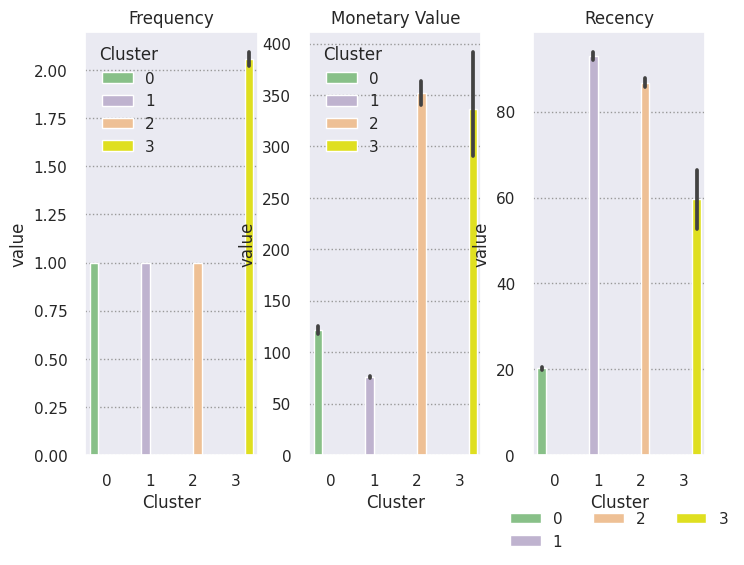

In [ ]:
# Define color palette
colors = ['#7fc97f', '#beaed4', '#fdc086', 'yellow']

# frequency
plt.subplot(1,3,1)
sns.barplot(x='Cluster', y='value', hue='Cluster', data=melted_rfm[melted_rfm['features'] == 'frequency'], palette=colors)
plt.title('Frequency')

# monetary
plt.subplot(1,3,2)
sns.barplot(x='Cluster', y='value', hue='Cluster', data=melted_rfm[melted_rfm['features'] == 'monetary_value'], palette=colors)
plt.title('Monetary Value')

# recency
plt.subplot(1,3,3)
sns.barplot(x='Cluster', y='value', hue='Cluster', data=melted_rfm[melted_rfm['features'] == 'recency'], palette=colors)
plt.title('Recency')

# Adjust the layout and legend
plt.subplots_adjust(wspace=0.3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()



In this part, we aim to evaluate the outcomes of using 4 clusters versus 3 clusters and determine which one produces superior results.



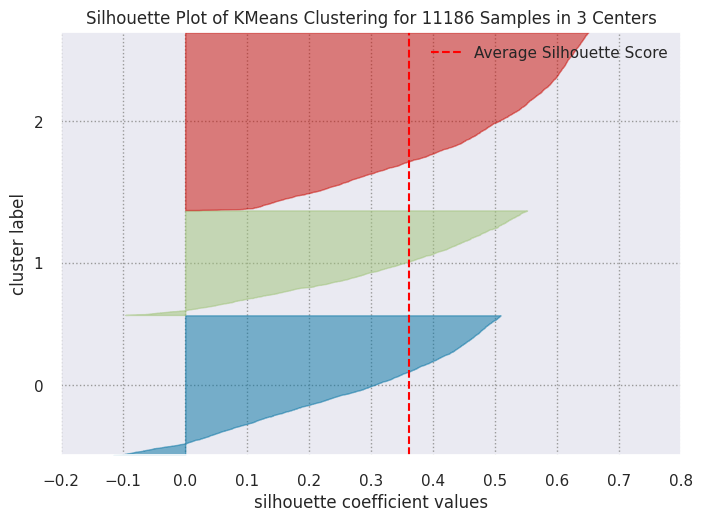

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11186 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 42), colors='yellowbrick')

visualizer.fit(rfm_norm)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
model = KMeans(n_clusters=3, random_state = 42).fit(rfm_norm)
centers = model.cluster_centers_


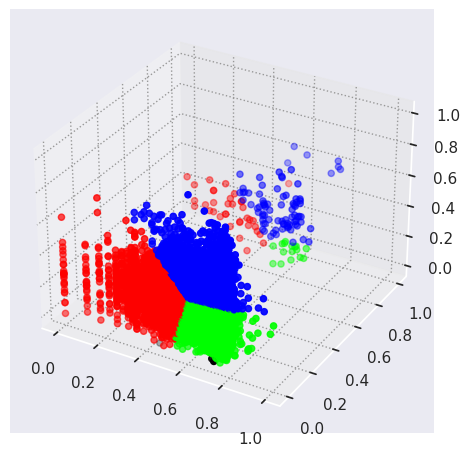

In [ ]:

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_norm['new_recency'], rfm_norm['new_frequency'], rfm_norm['new_monetary_value'], cmap = 'brg',
          c=model.predict(rfm_norm))
ax.scatter(centers[:, 0], centers[:, 1], c='black')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(rfm_norm, x='new_recency', y='new_frequency', z='new_monetary_value',
                    color=model.predict(rfm_norm), symbol=model.predict(rfm_norm),
                    symbol_sequence=['circle', 'square', 'diamond'],
                     hover_data={'cluster': model.predict(rfm_norm)})

fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary Value'),
                  showlegend=False)

fig.show()

It is evident that when utilizing 4 clusters, the resulting clusters are more distinct and comprehensible.

The 0 cluster represents customers with the highest monetary value and high purchasing amounts. These customers are likely to be the most valuable to the company.

Clusters 1 and 2 are similar in terms of their frequency and monetary value, but there is a difference in recency. Cluster 2 consists of customers who have made more recent purchases compared to Cluster 1. This suggests that Cluster 2 may be a group of more active or engaged customers who have recently interacted with the company.

In [ ]:
silhouette = silhouette_score(rfm_norm, model.labels_)

# Print the resulting values
print(f'Silhouette score: {silhouette}')

Silhouette score: 0.3612141436127569


In [ ]:
calinski = calinski_harabasz_score(rfm_norm , model.labels_)

print(f'calinski score: {calinski}')

calinski score: 6032.310992180872
